# Анализ продуктовых метрик

В данном ноутбуке проводится анализ пользовательского поведения в мобильном приложении и рассчитываются ключевые продуктовые метрики.

## Импорт библиотек и загрузка данных

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from metrics import calculate_dau, calculate_conversion, calculate_arpu

In [8]:
df = pd.read_csv('events.csv')
df['event_date'] = pd.to_datetime(df['event_date'])
df.head()

,user_id,event,event_date,revenue
0,1,install,2023-01-01,0
1,1,registration,2023-01-01,0
2,1,purchase,2023-01-03,499
3,2,install,2023-01-01,0
4,2,registration,2023-01-02,0


## Daily Active Users (DAU)

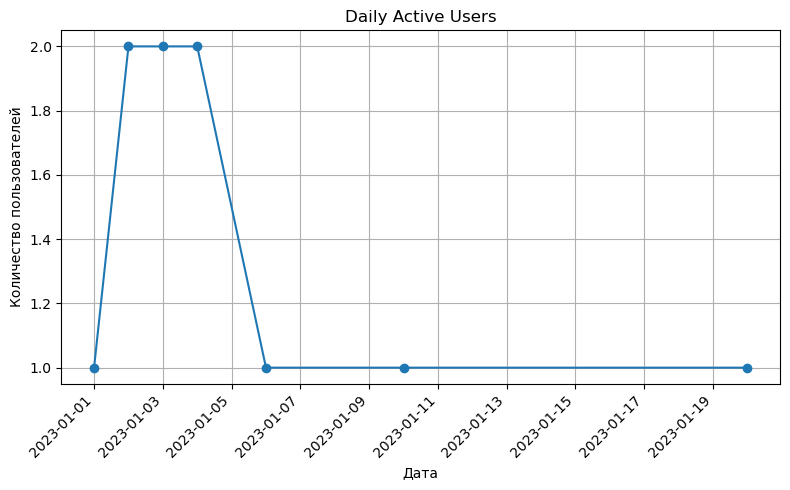

In [14]:
dau = calculate_dau(df)

plt.figure(figsize=(8,5))
plt.plot(dau['event_date'], dau['DAU'], marker='o')
plt.title('Daily Active Users')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Конверсия в покупку

In [10]:
conversion = calculate_conversion(df)
conversion

57.14

## ARPU (Average Revenue Per User)

In [11]:
arpu = calculate_arpu(df)
arpu

np.float64(313.71)

## Retention пользователей

In [12]:
registrations = df[df['event'] == 'registration'][['user_id', 'event_date']]
registrations.columns = ['user_id', 'reg_date']

activity = df.merge(registrations, on='user_id')
activity['days_since_reg'] = (activity['event_date'] - activity['reg_date']).dt.days

retention = (
    activity.groupby('days_since_reg')['user_id']
    .nunique()
    .reset_index(name='users')
)

retention

,days_since_reg,users
0,-1,2
1,0,6
2,1,1
3,2,1
4,8,1
5,14,1


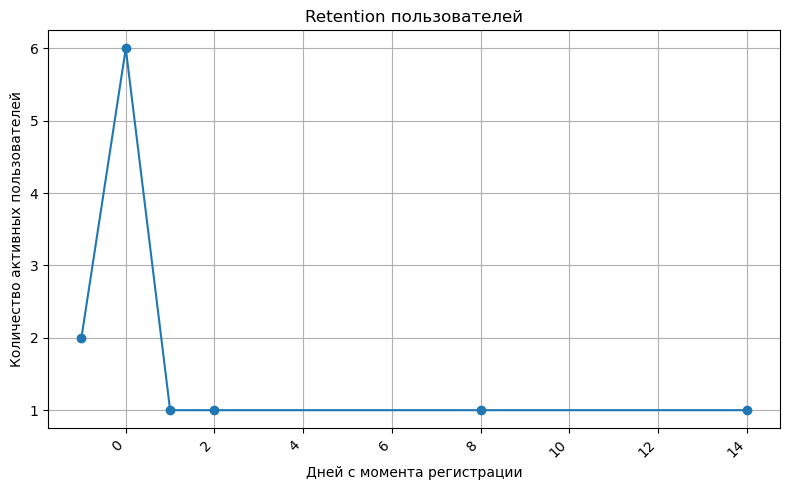

In [15]:
plt.figure(figsize=(8,5))
plt.plot(retention['days_since_reg'], retention['users'], marker='o')
plt.title('Retention пользователей')
plt.xlabel('Дней с момента регистрации')
plt.ylabel('Количество активных пользователей')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Выводы

- Пользовательская активность снижается спустя несколько дней после регистрации
- Конверсия в покупку находится на среднем уровне
- ARPU показывает потенциал для роста за счёт удержания пользователей